In [1]:
!unzip etl_filtered_v1.zip

Archive:  etl_filtered_v1.zip
  inflating: etl_filtered_v1.csv     


In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import datetime
import seaborn as sns

In [4]:
df = pd.read_csv('etl_filtered_v1.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [2]:
def get_datetime(row):
  year = row["FIRE_YEAR"]
  doy = row["DISCOVERY_DOY"]
  return datetime.datetime.strptime(f"{year} {doy}", '%Y %j')

def get_month(row):
  year = row["FIRE_YEAR"]
  doy = row["DISCOVERY_DOY"]
  return datetime.datetime.strptime(f"{year} {doy}", '%Y %j').month

In [5]:
df["month"] = df.apply(lambda row: get_month(row), axis=1)

In [8]:
df = df[df["STAT_CAUSE_DESCR"] != 'Missing/Undefined']

In [31]:
df1 = df.groupby(["STATE", "month", "STAT_CAUSE_DESCR"]).size().sort_values(ascending = False).reset_index(name="size")

In [32]:
df1

,STATE,month,STAT_CAUSE_DESCR,size
0,GA,3,Debris Burning,2931
1,OR,8,Lightning,2887
2,TX,1,Debris Burning,2786
3,GA,2,Debris Burning,2588
4,NY,4,Miscellaneous,2451
...,...,...,...,...
5190,SD,5,Fireworks,1
5191,VA,9,Children,1
5192,MO,12,Smoking,1
5193,ID,12,Debris Burning,1


In [55]:
reasons_df = df1.groupby(["STAT_CAUSE_DESCR"]).size().sort_values(ascending = False).reset_index(name="size")
reasons_df["STAT_CAUSE_DESCR"]

0      Miscellaneous
1     Debris Burning
2              Arson
3           Campfire
4      Equipment Use
5            Smoking
6           Children
7          Lightning
8          Powerline
9           Railroad
10         Structure
11         Fireworks
Name: STAT_CAUSE_DESCR, dtype: object

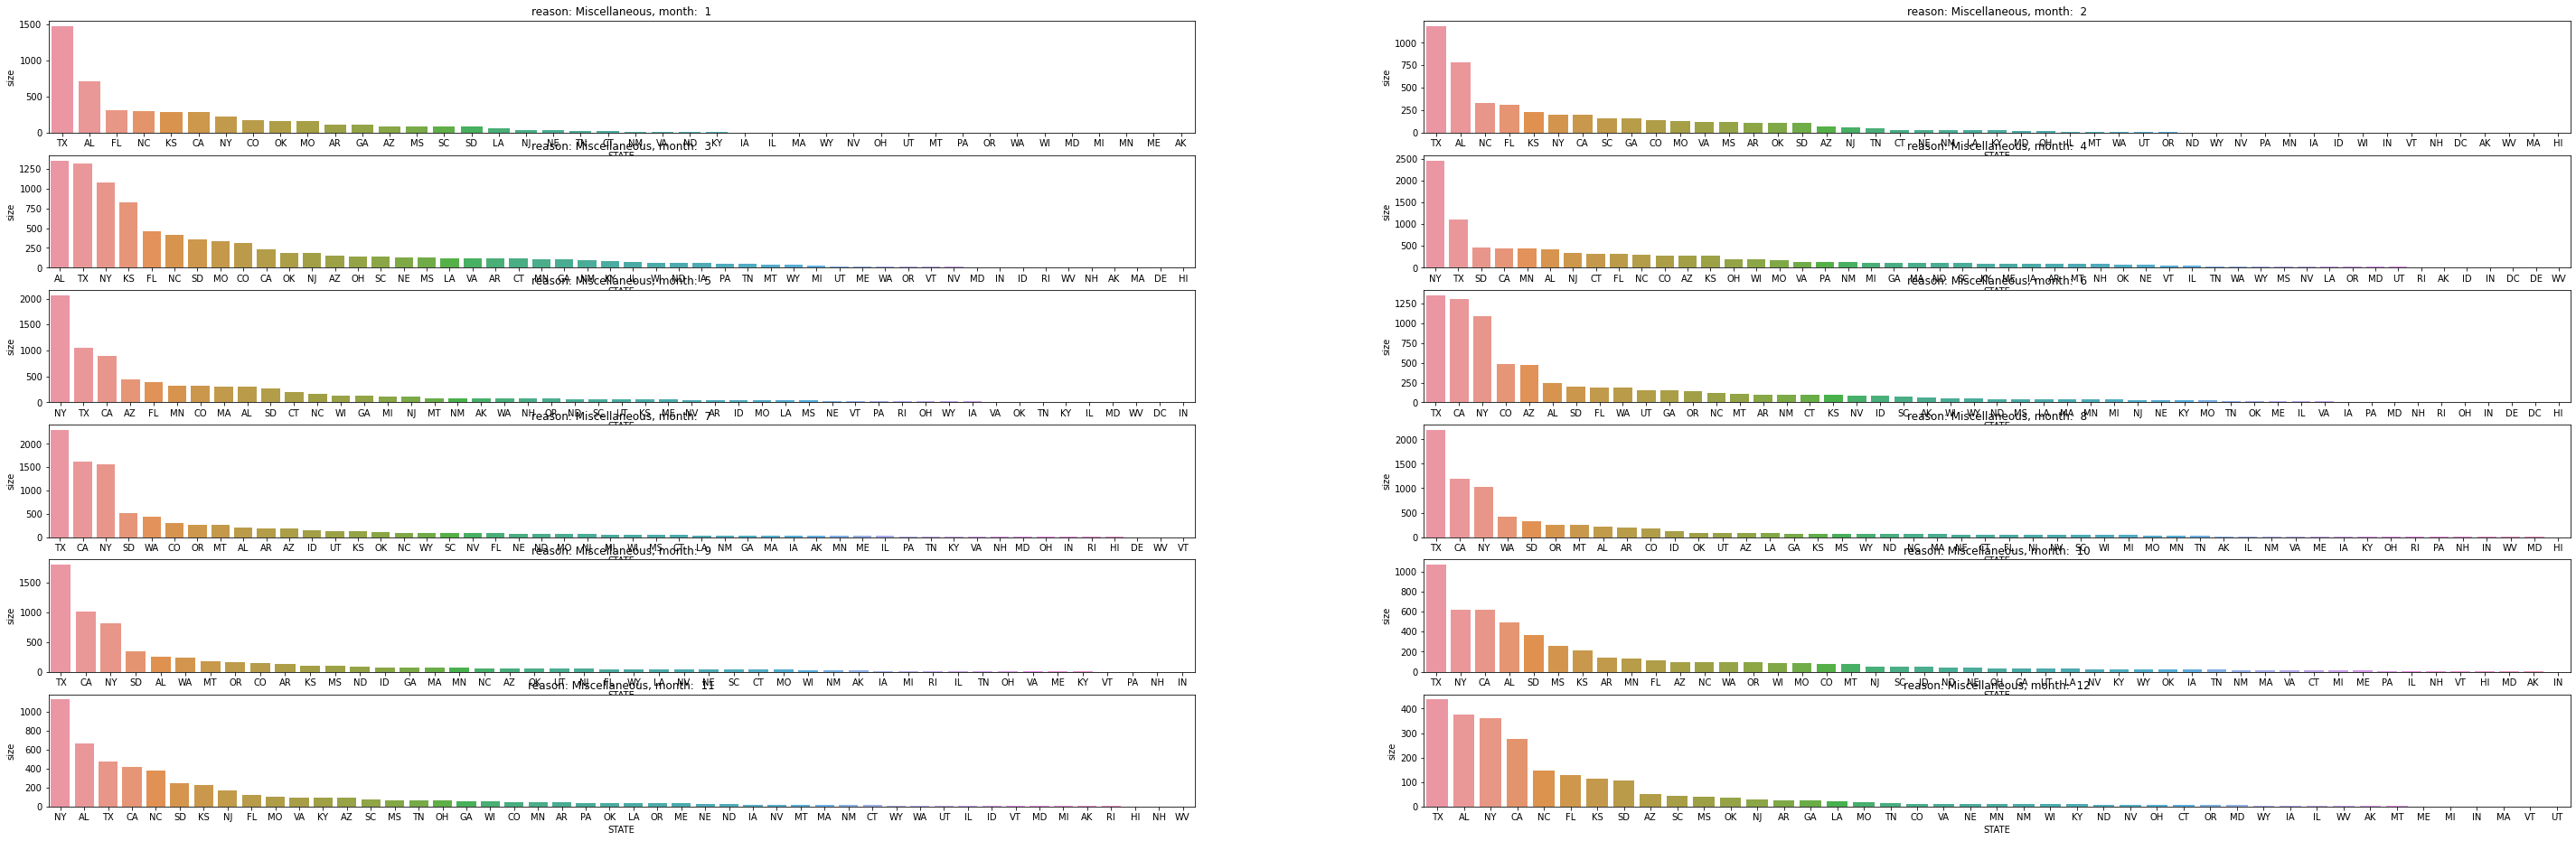

In [57]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Miscellaneous") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Miscellaneous, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

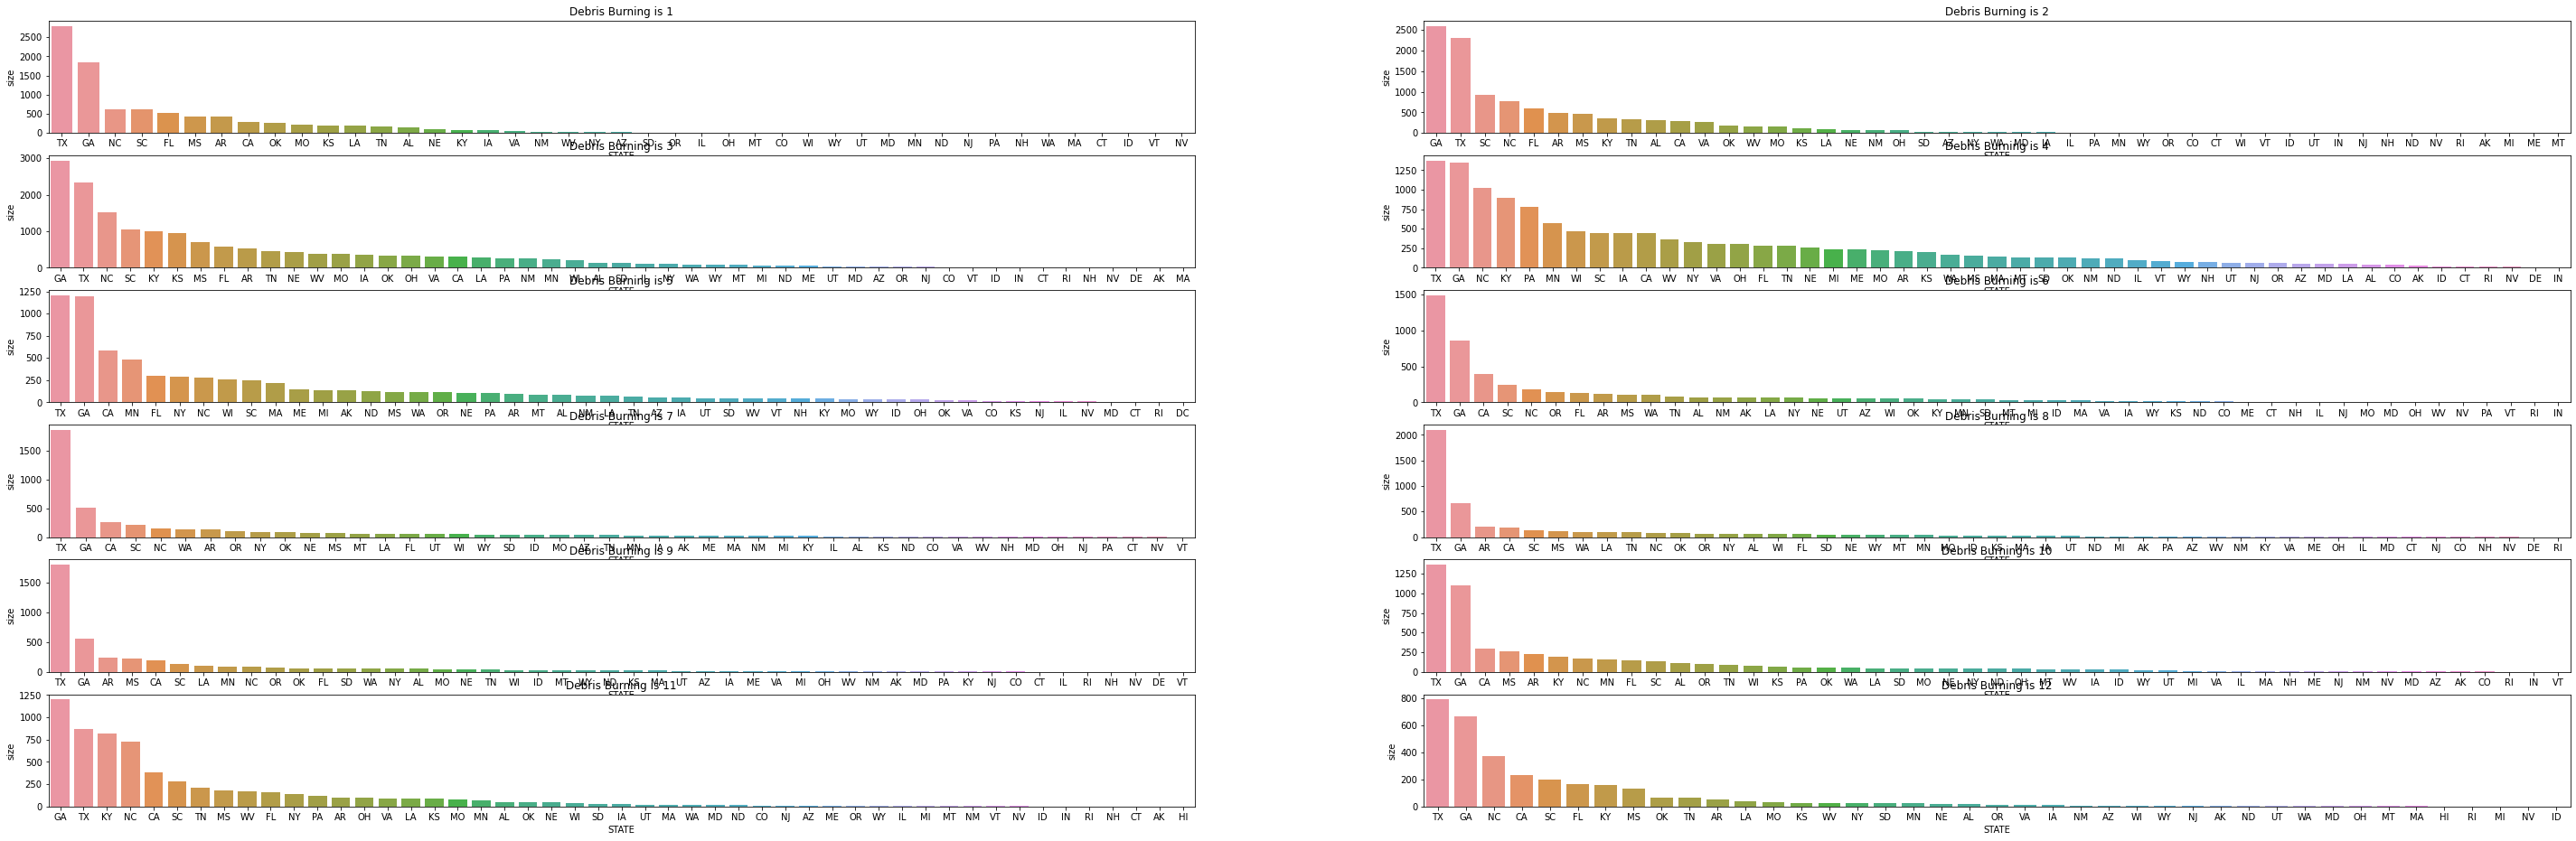

In [56]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Debris Burning") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Debris Burning, month: {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

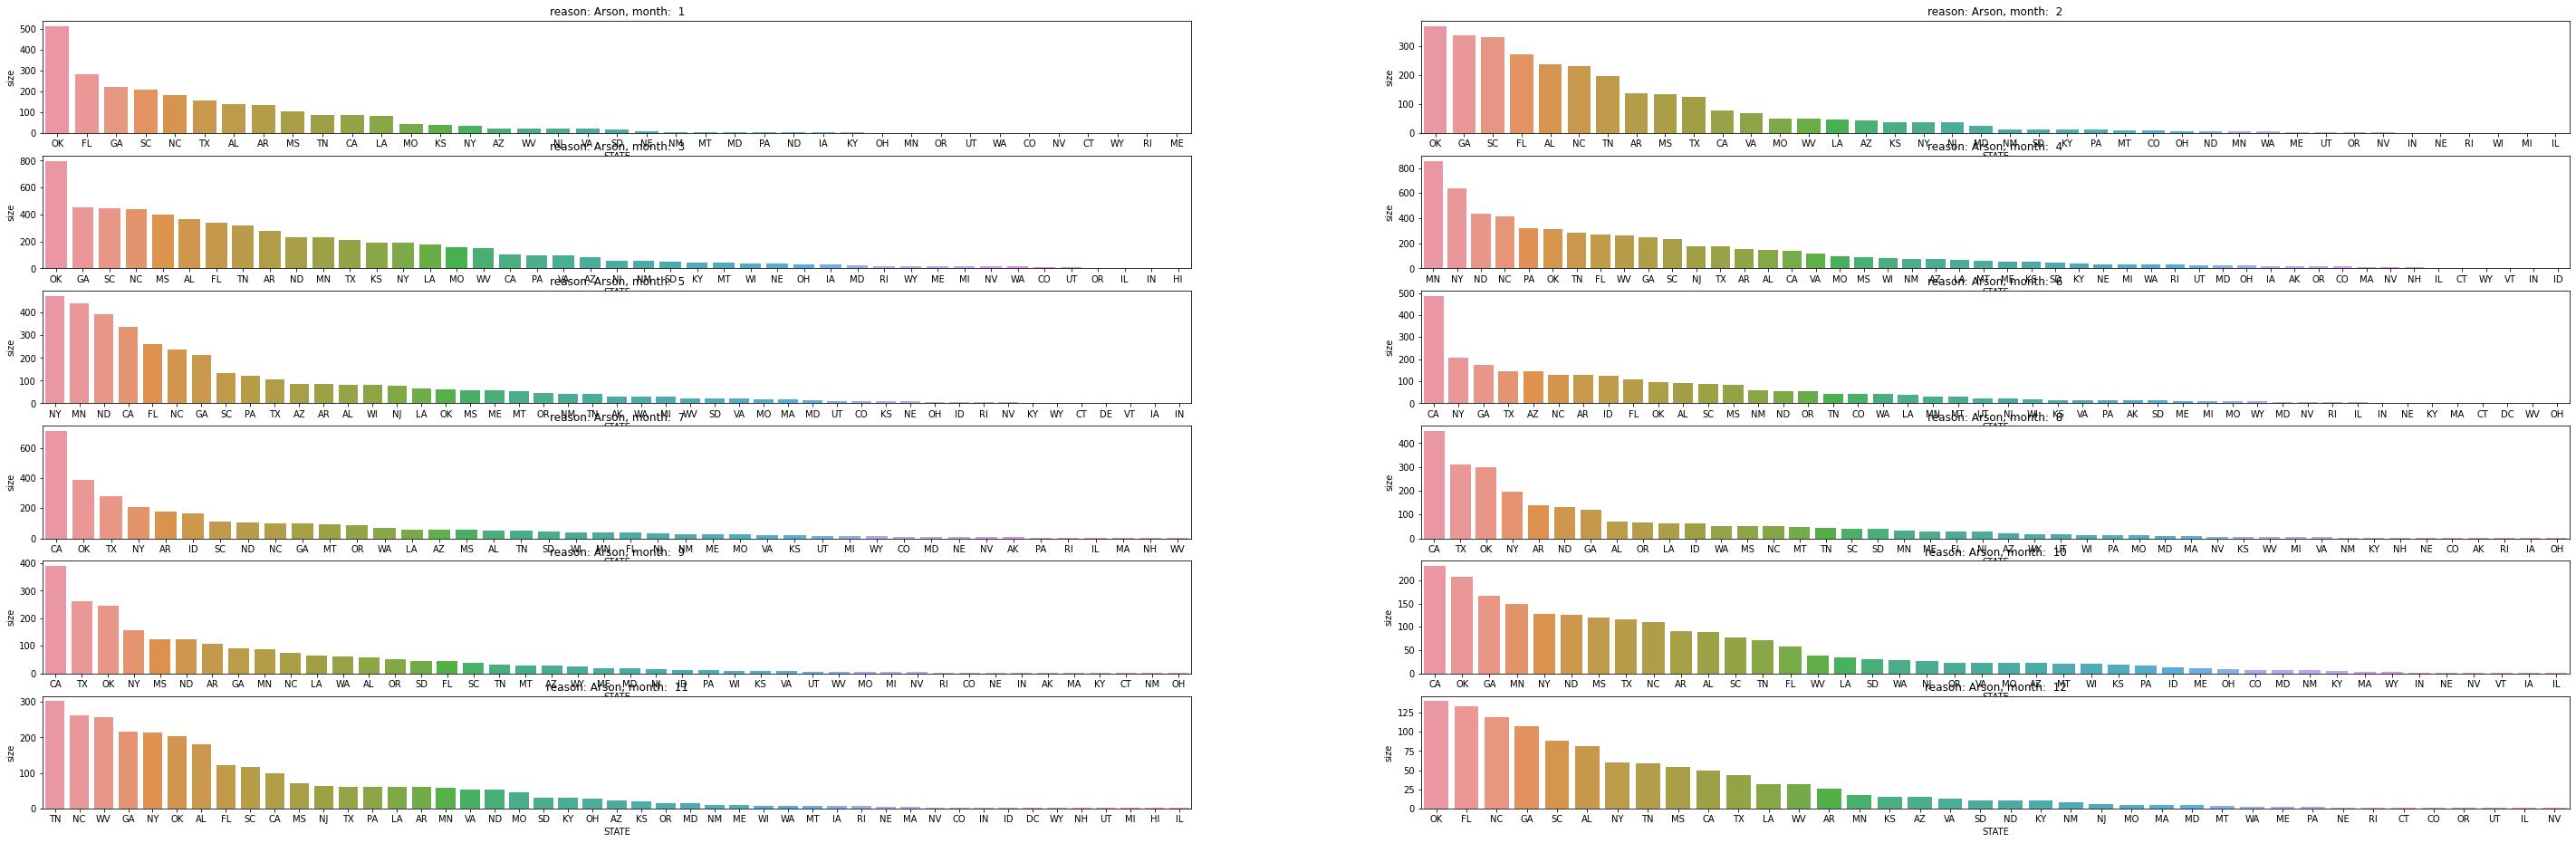

In [58]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Arson") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Arson, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

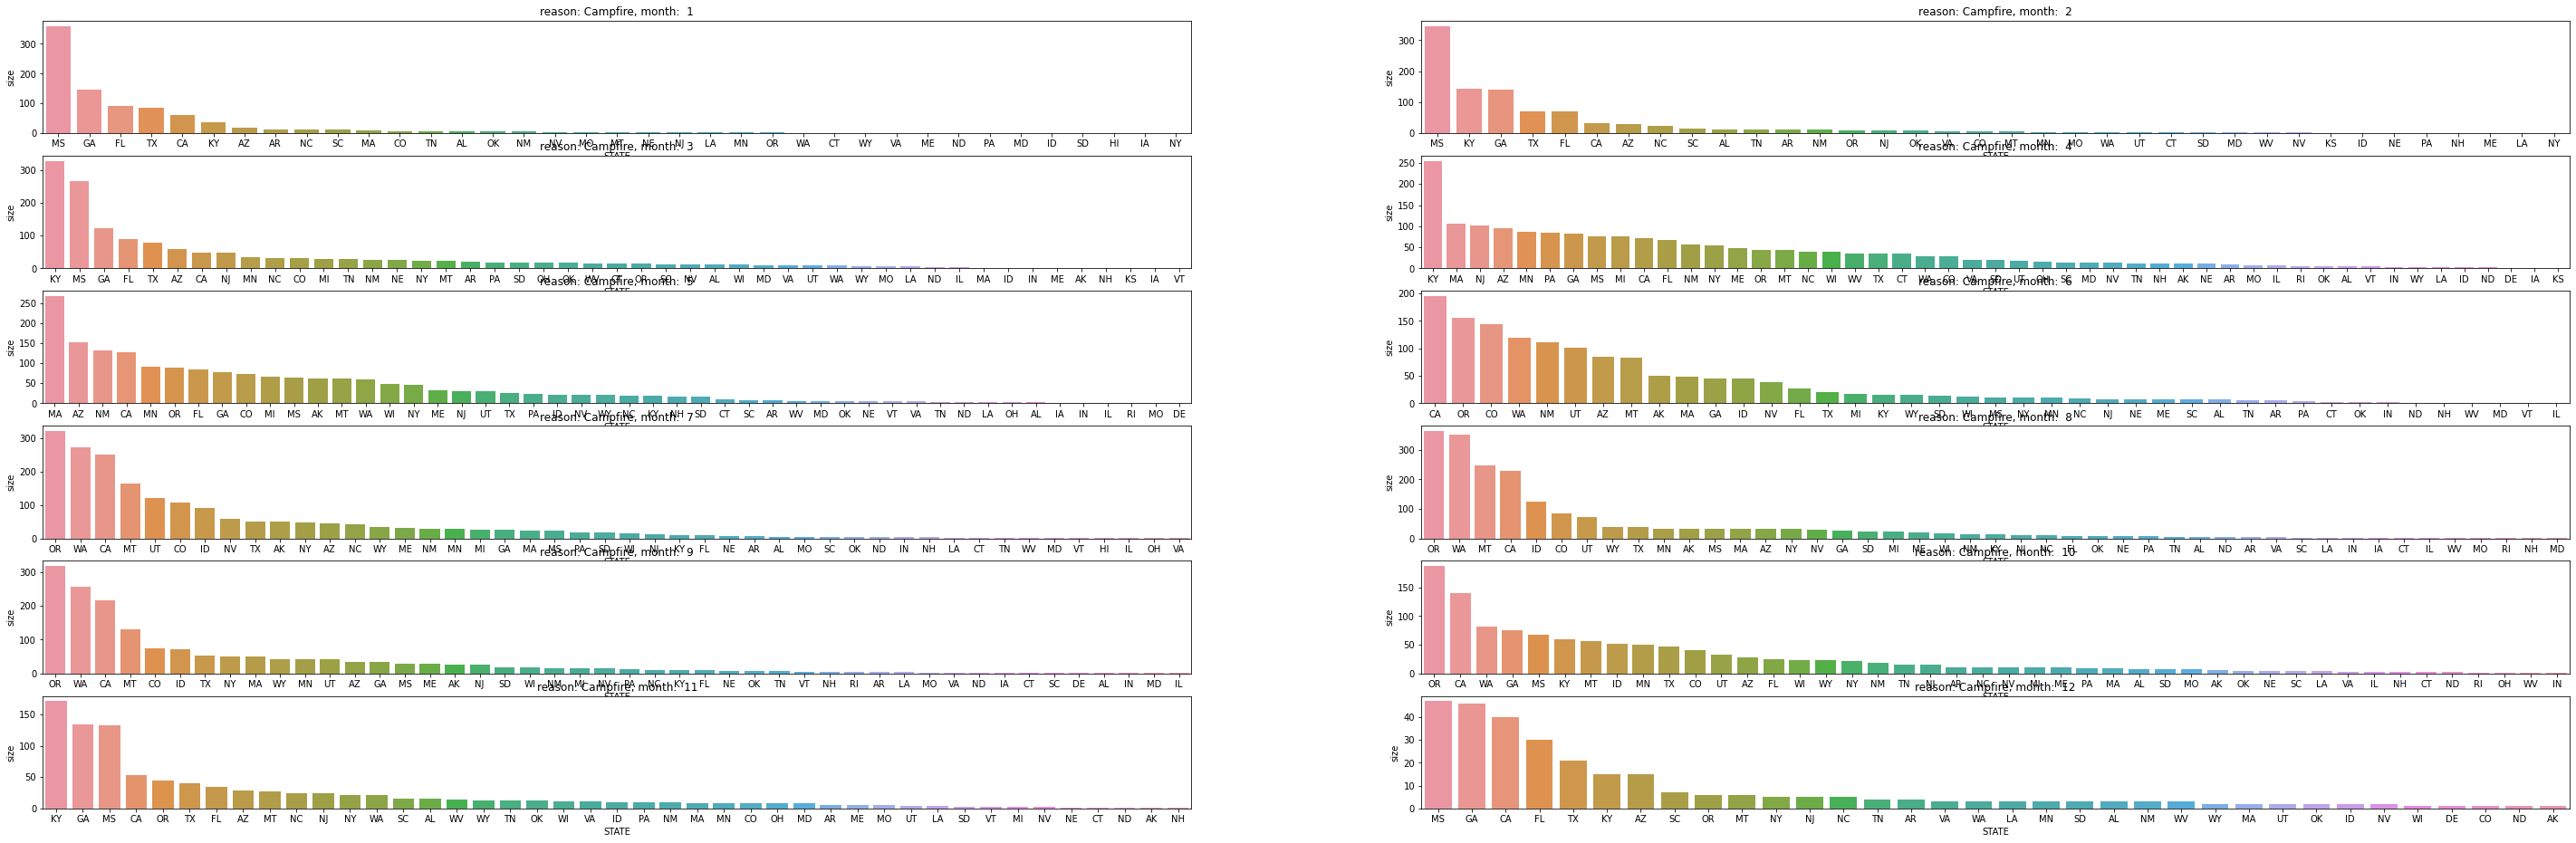

In [59]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Campfire") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Campfire, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

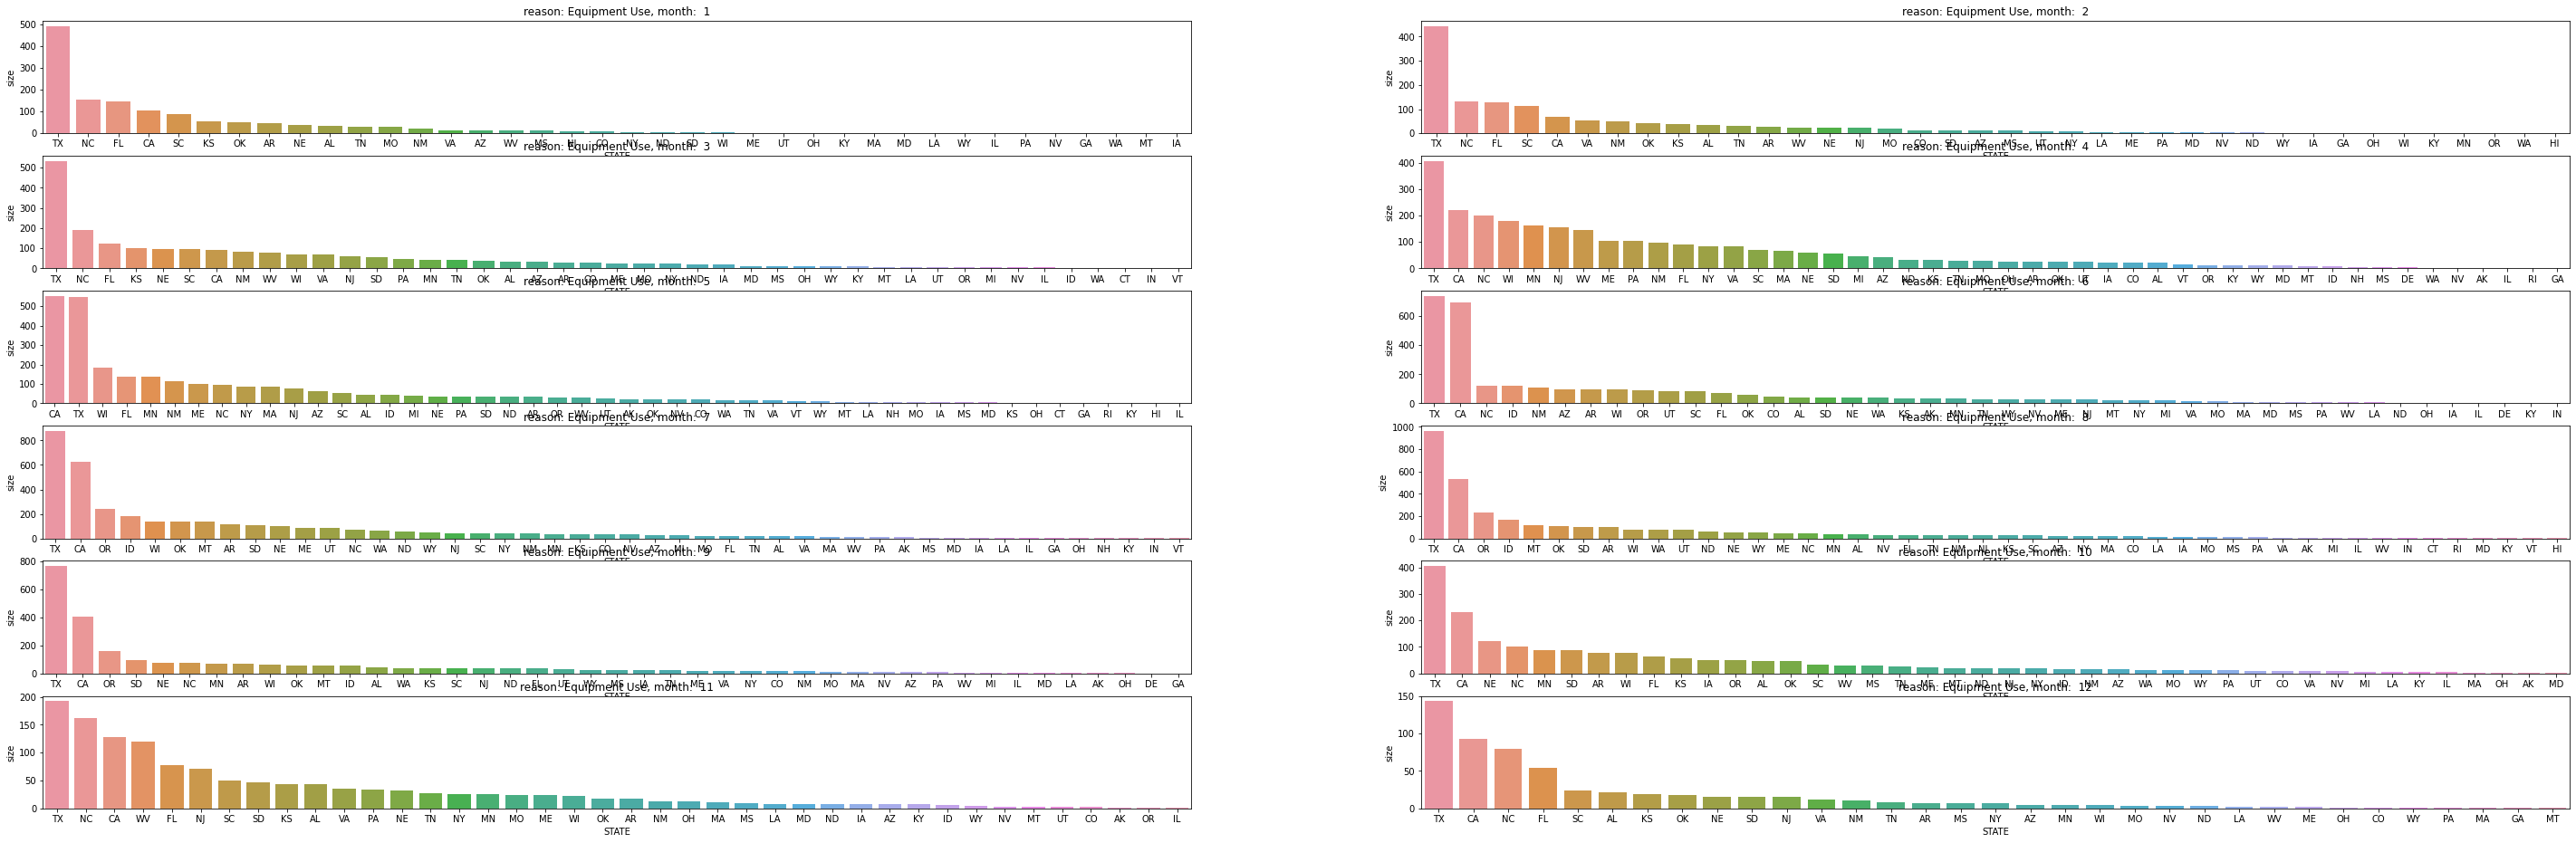

In [60]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Equipment Use") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Equipment Use, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

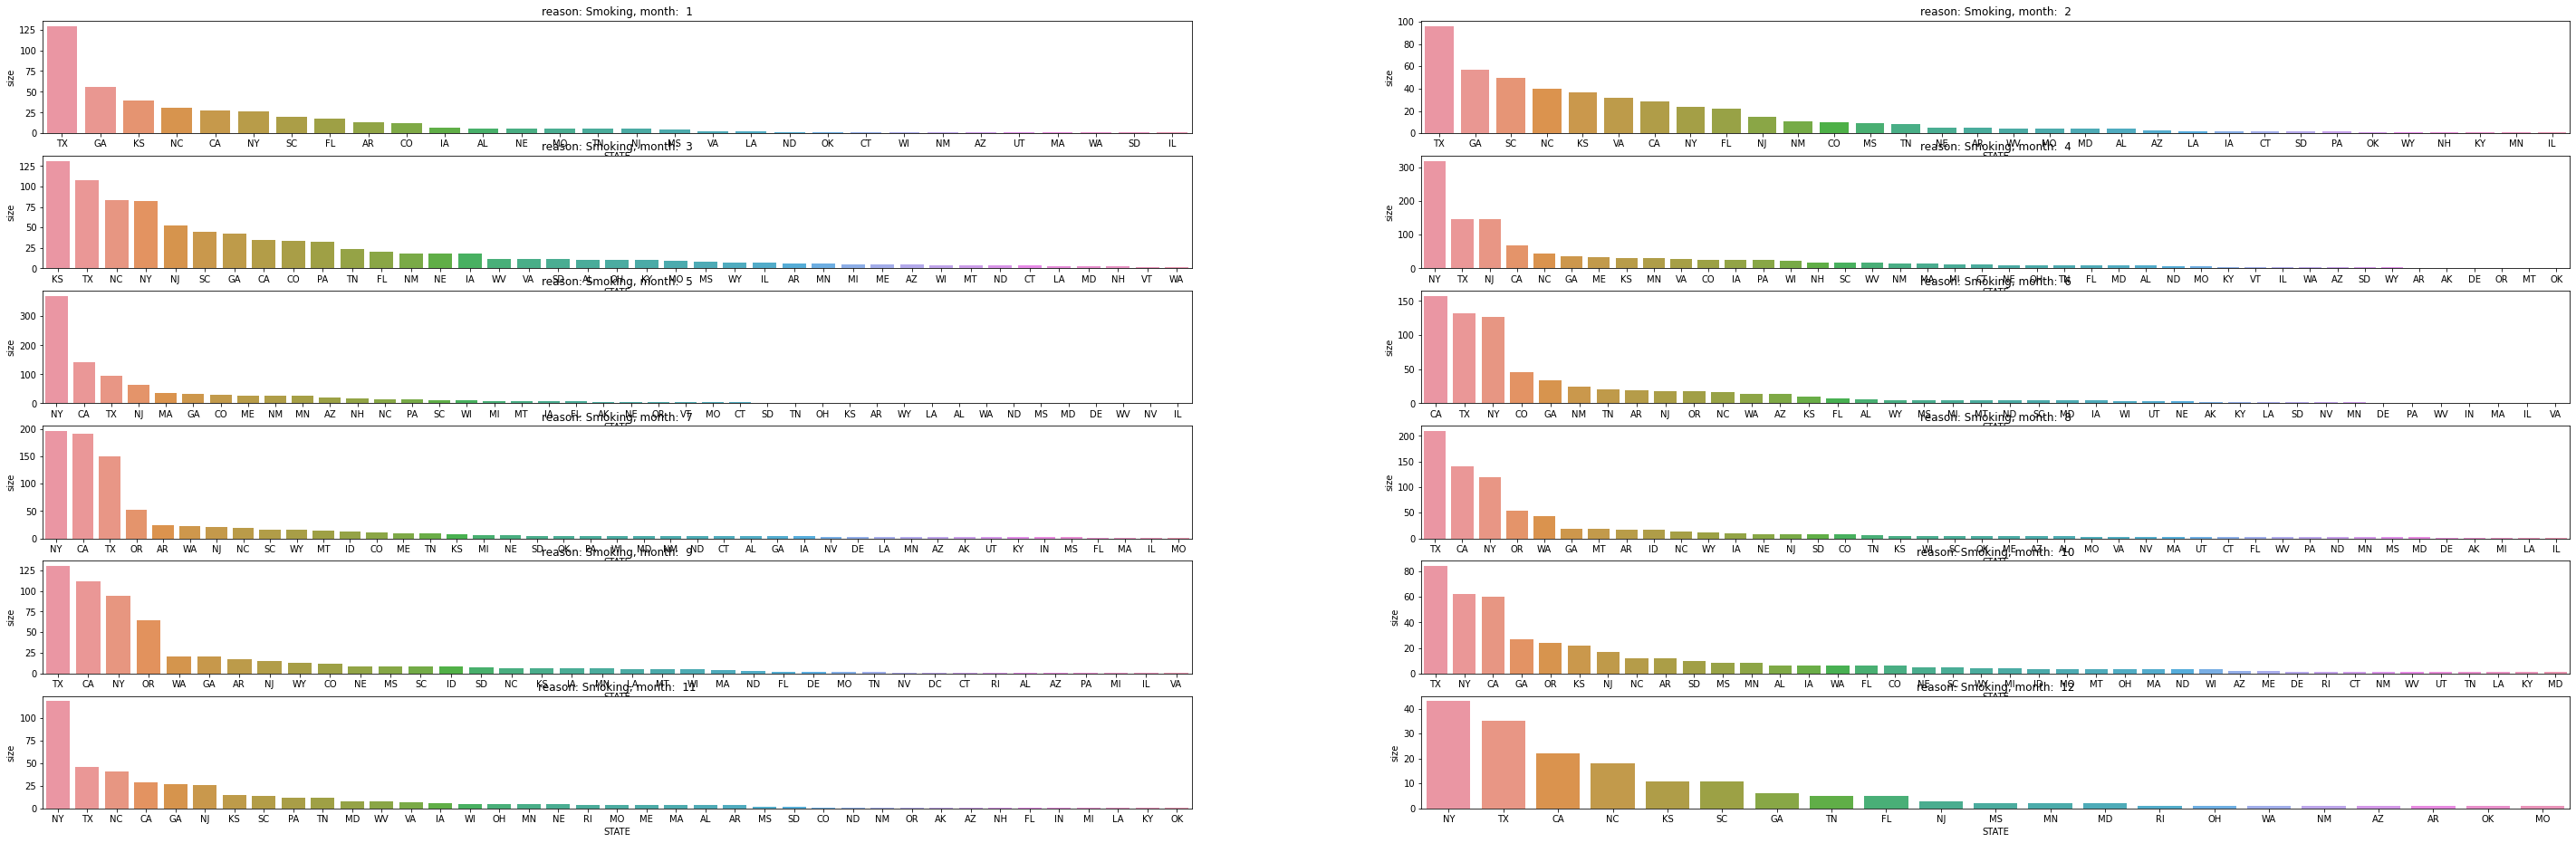

In [61]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Smoking") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Smoking, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

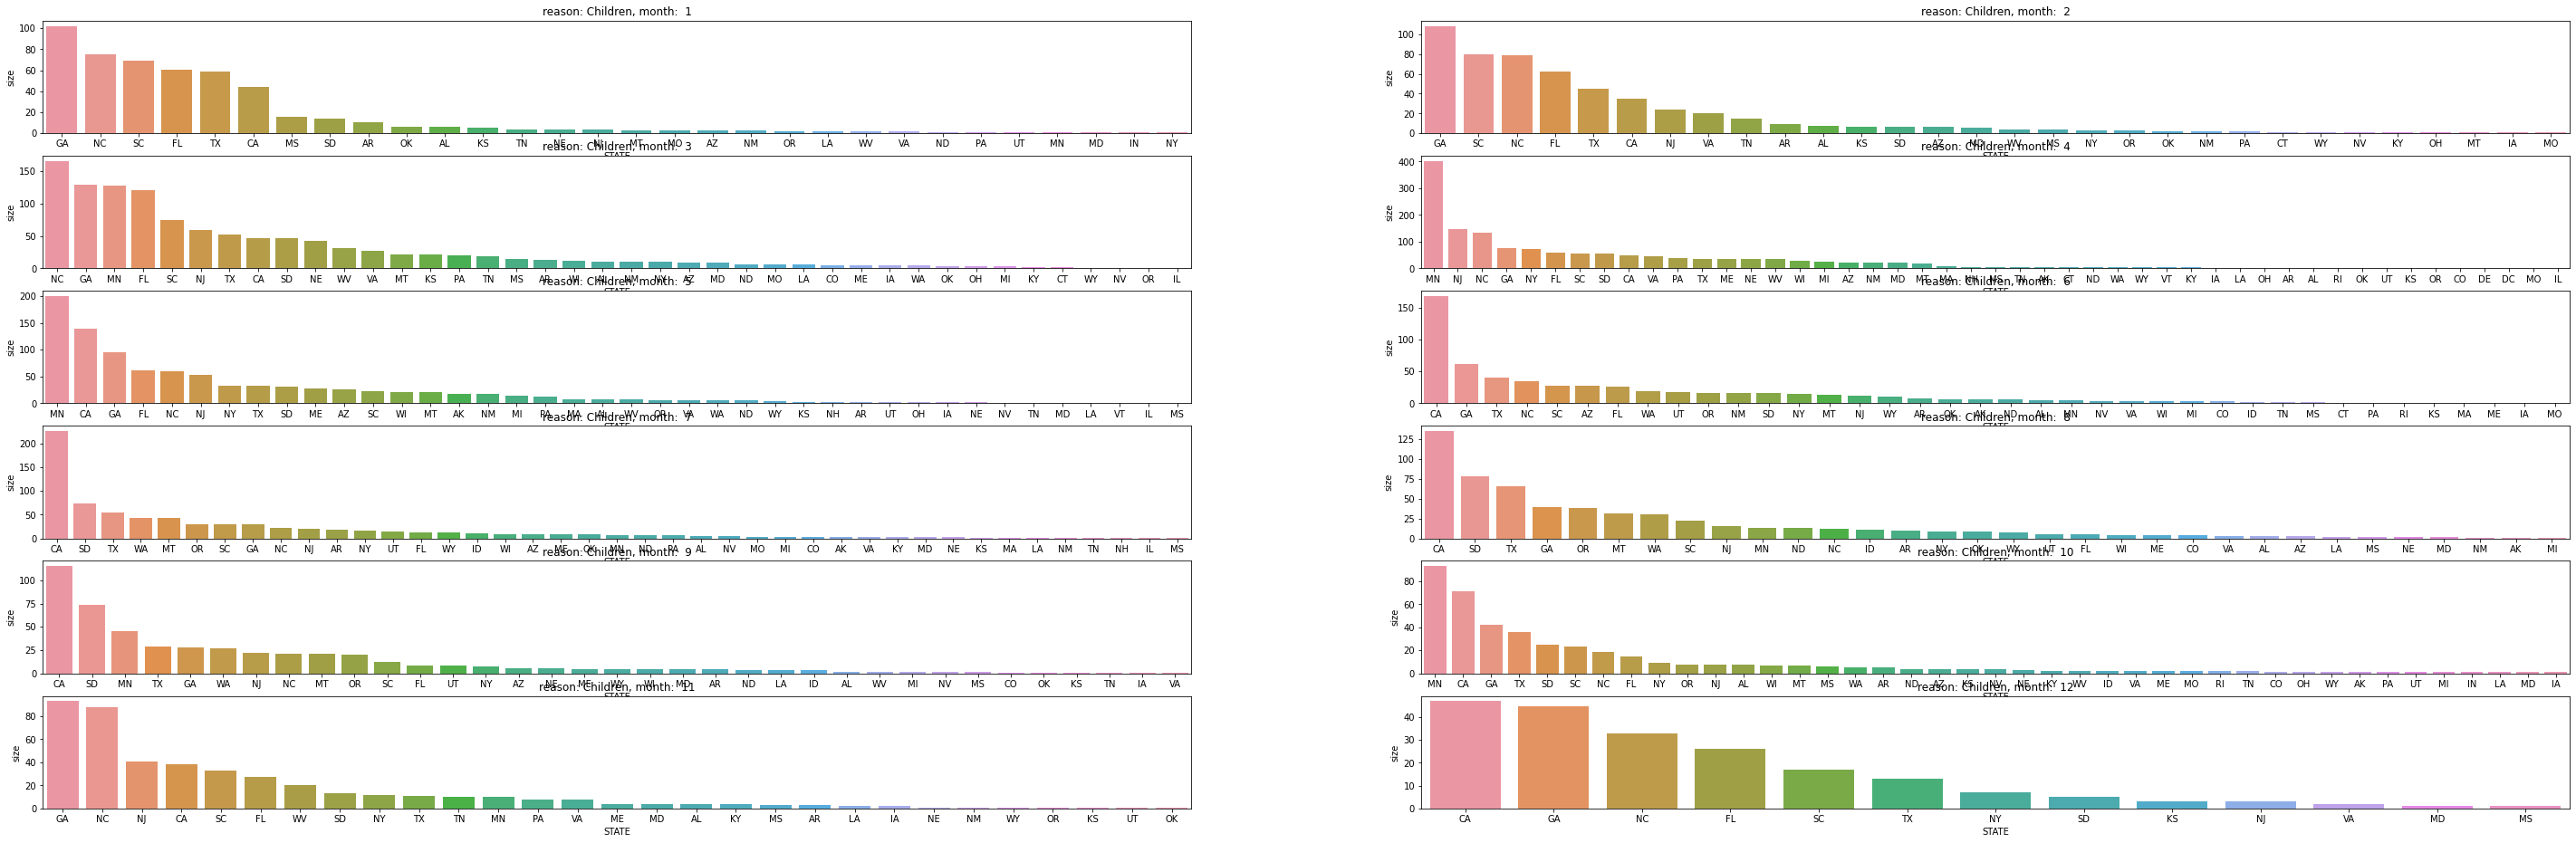

In [62]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Children") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Children, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

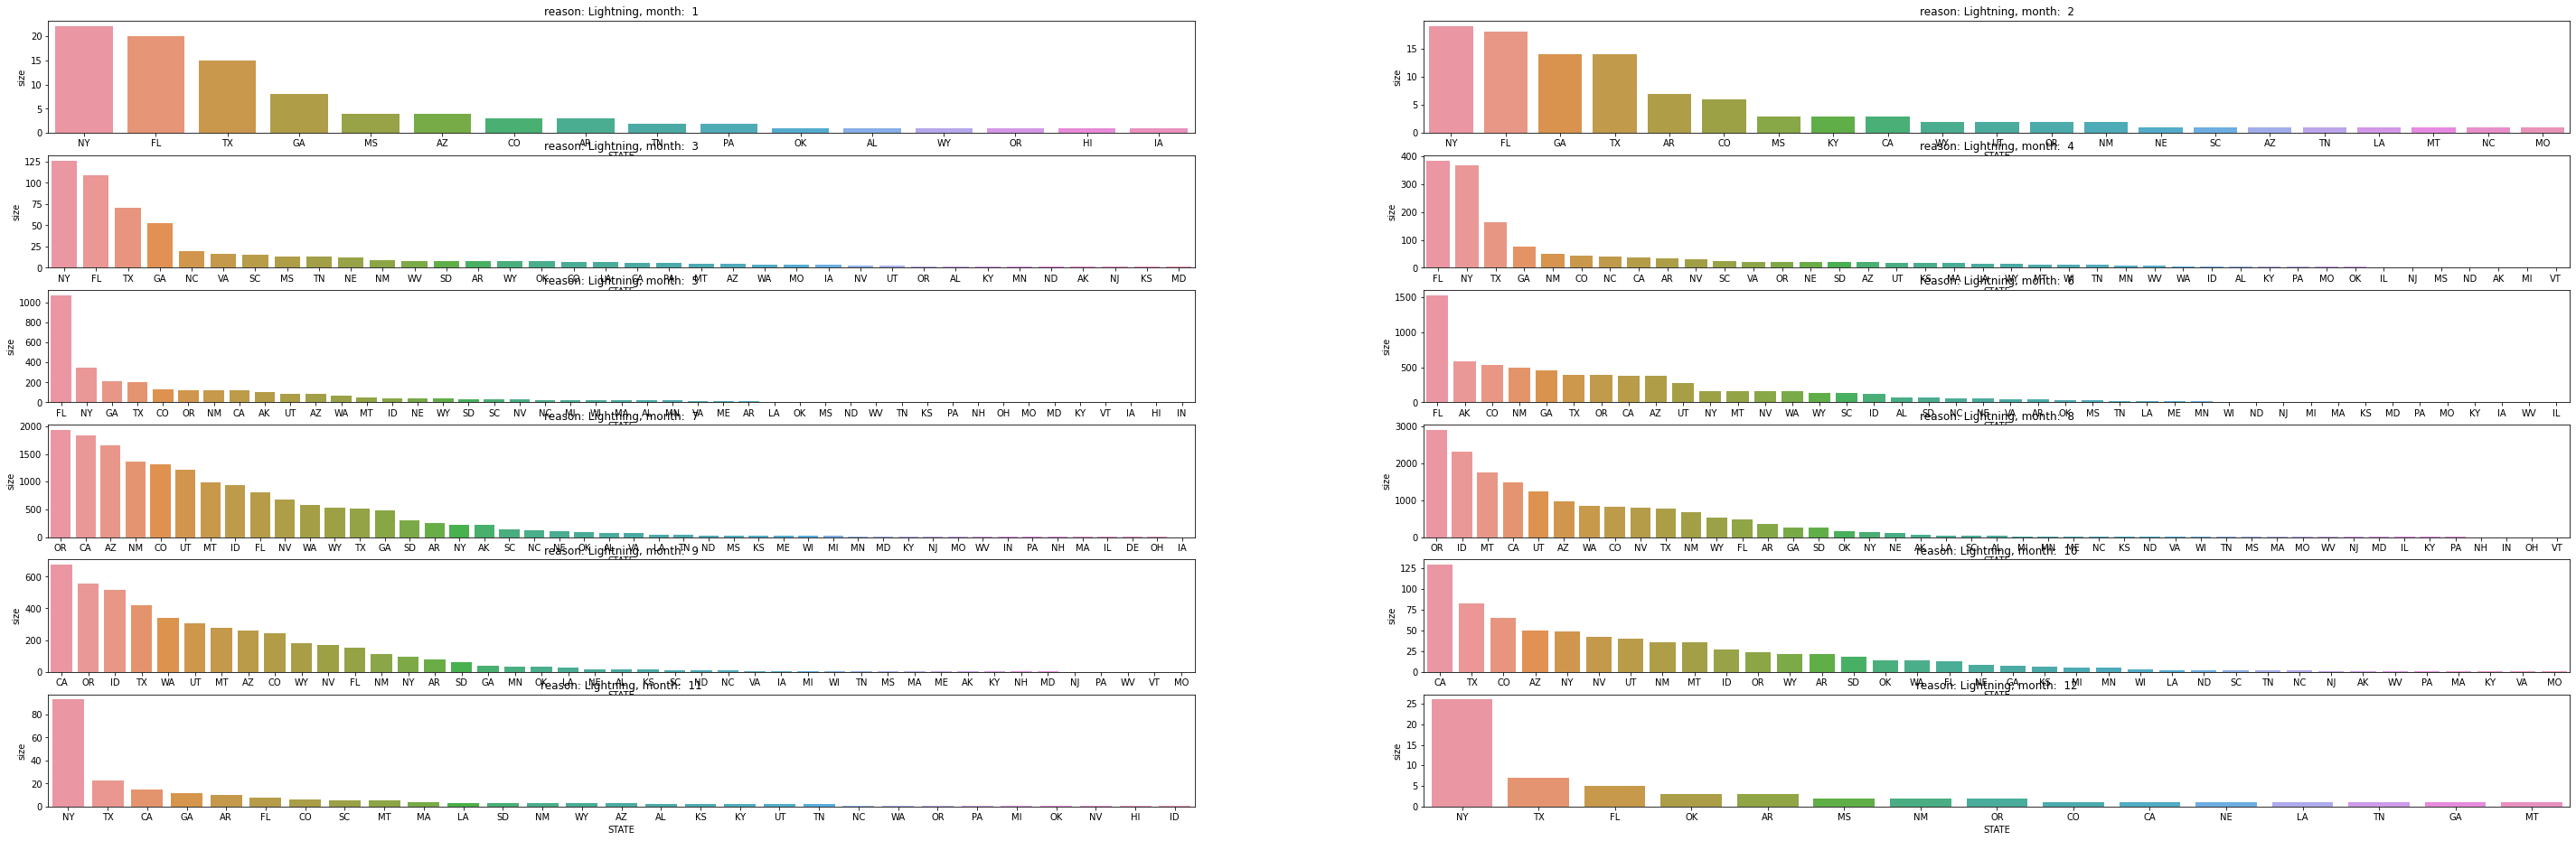

In [63]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Lightning") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Lightning, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

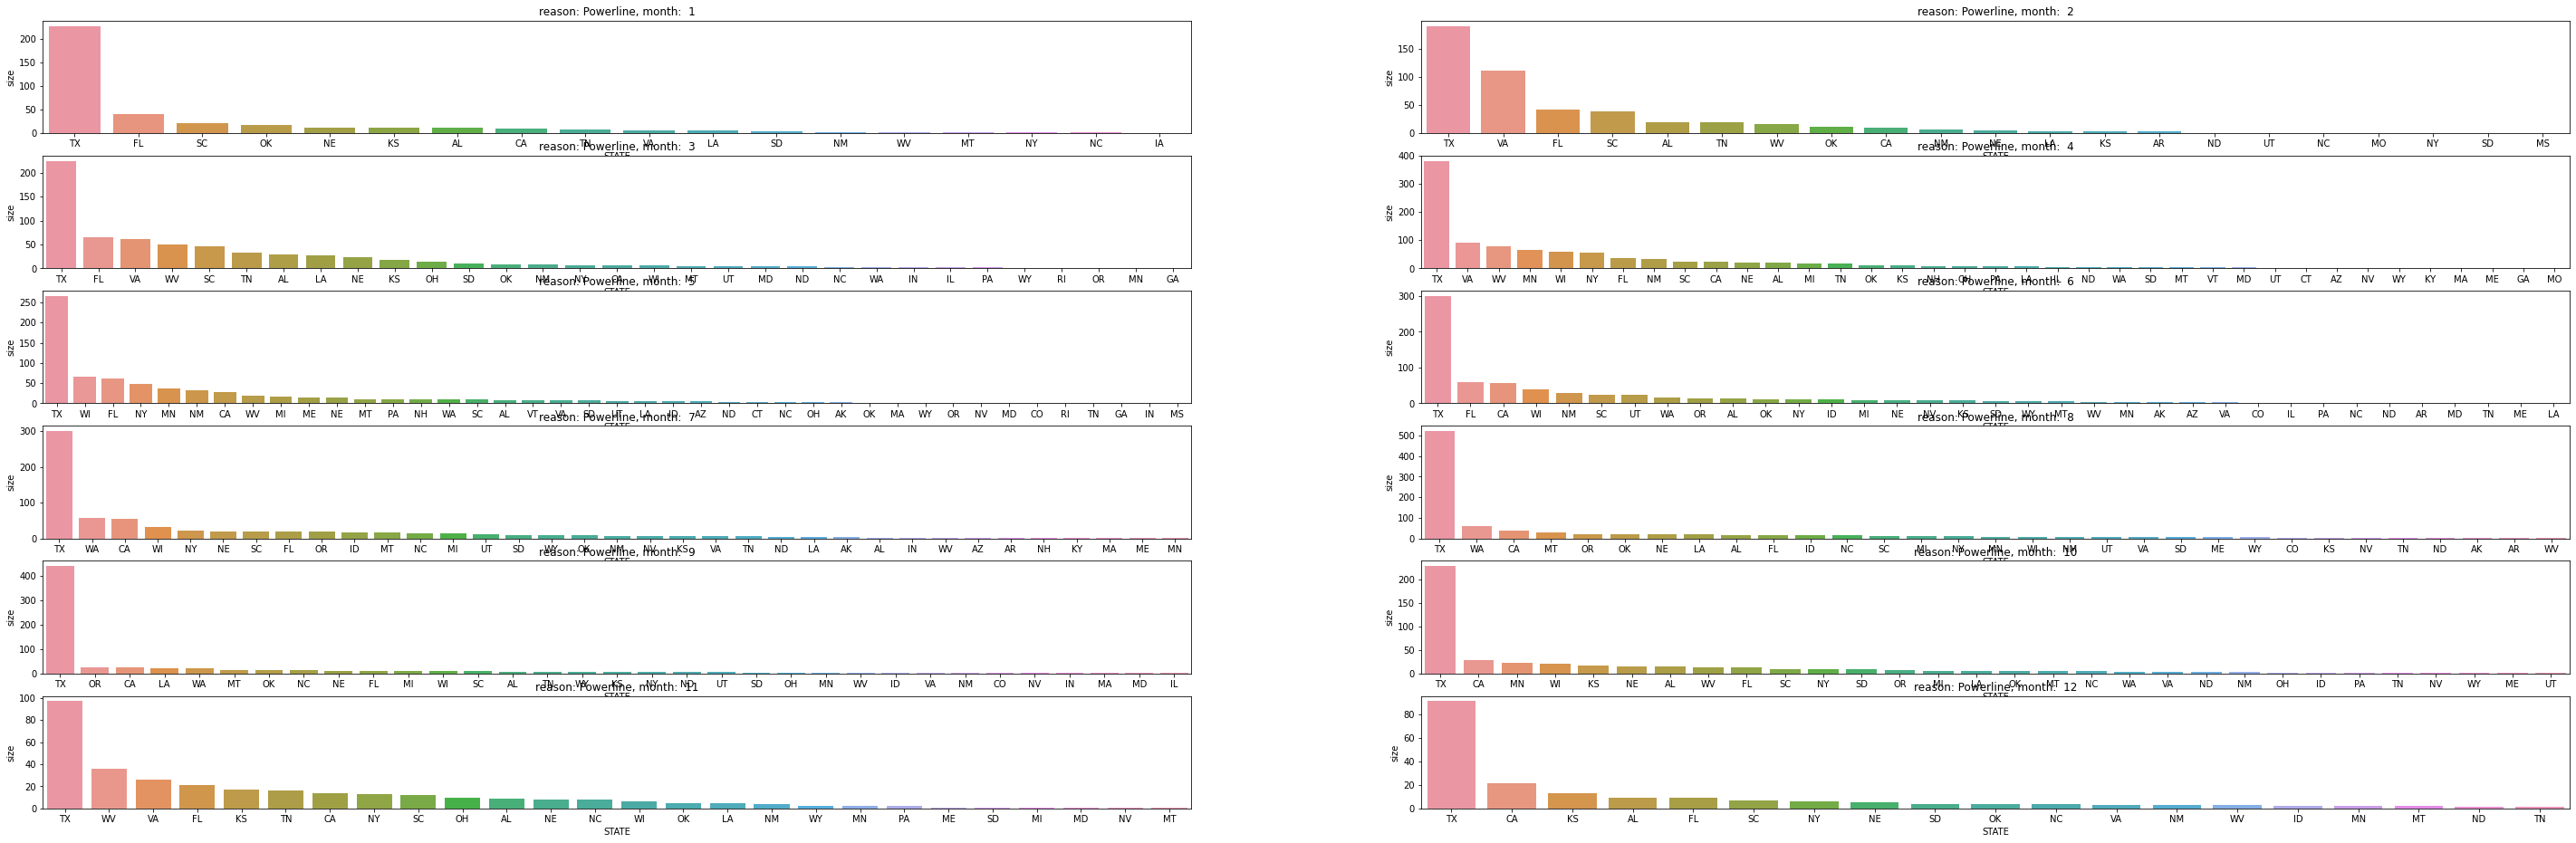

In [64]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Powerline") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Powerline, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

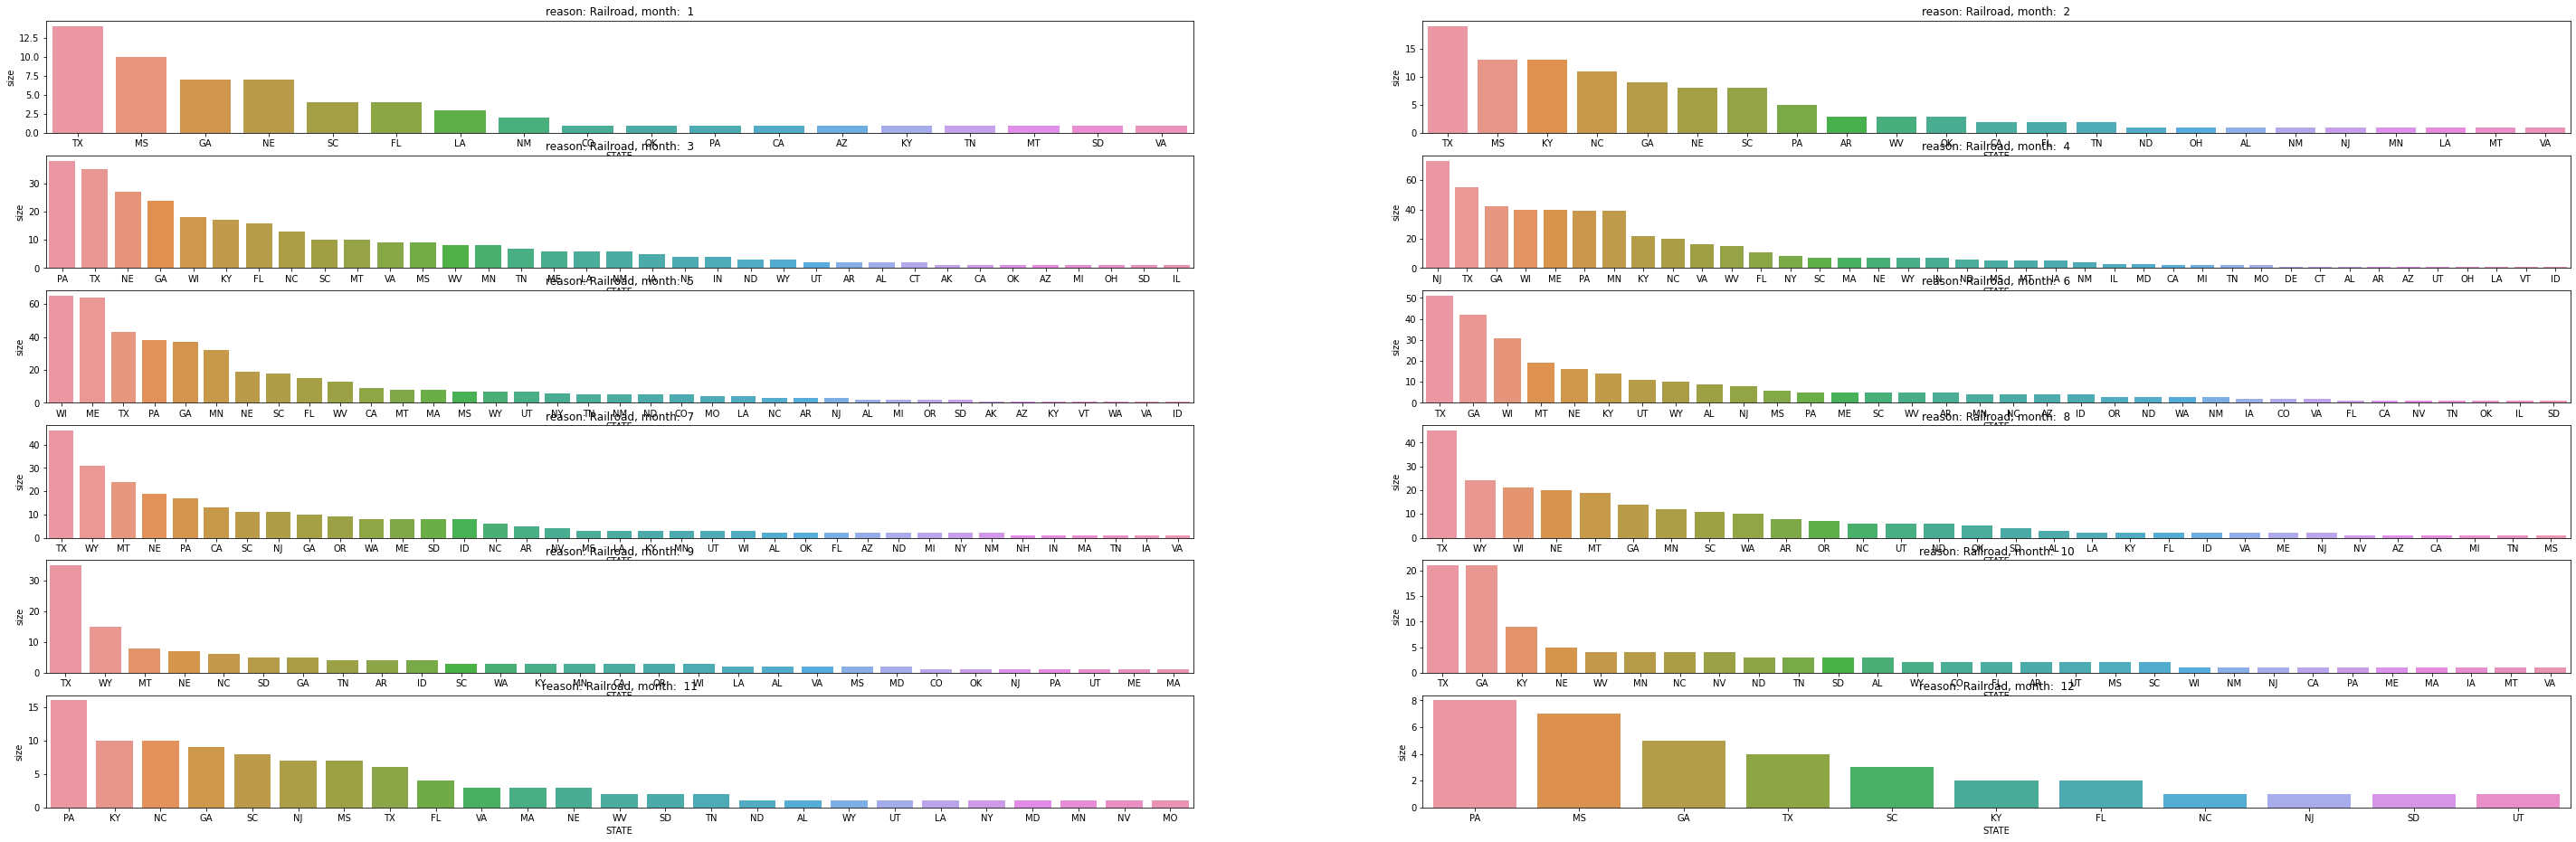

In [65]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Railroad") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Railroad, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

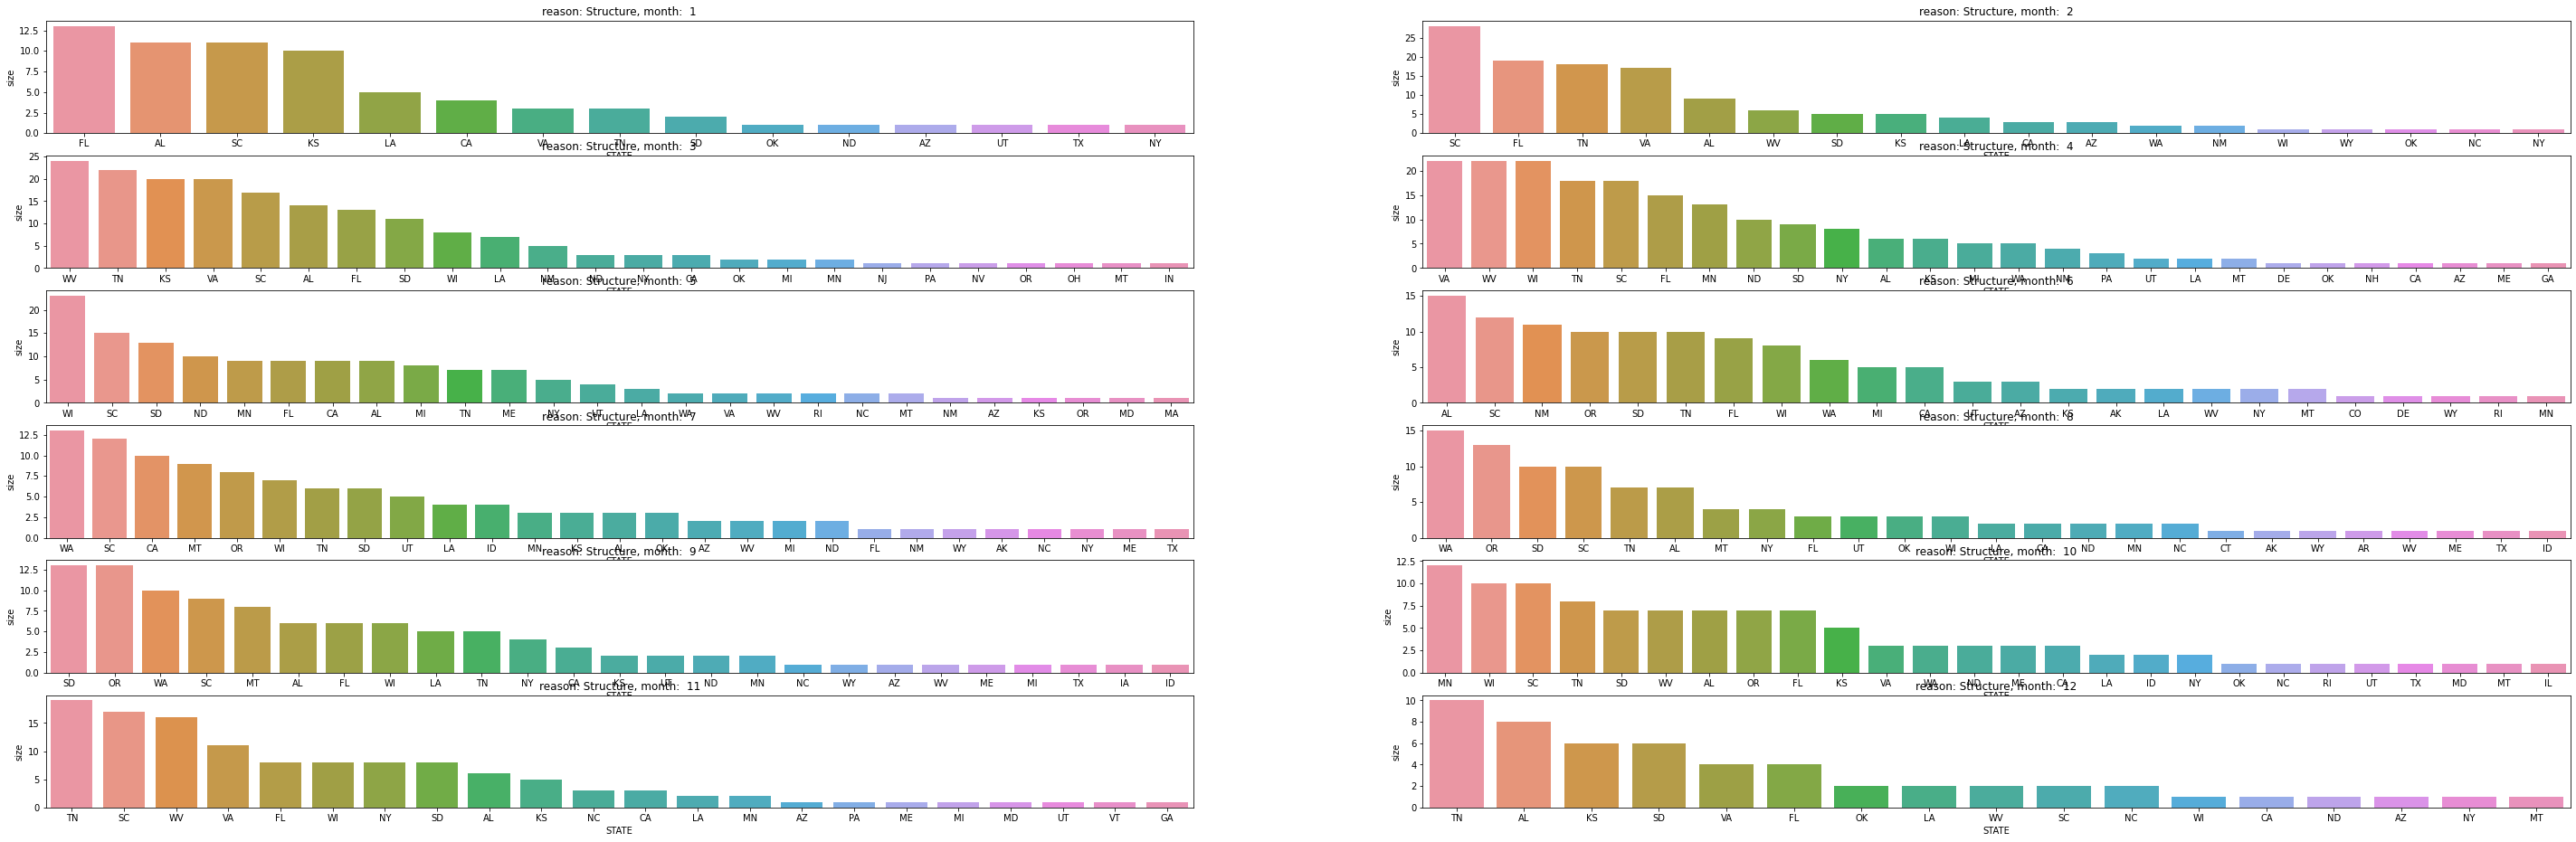

In [66]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Structure") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Structure, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()

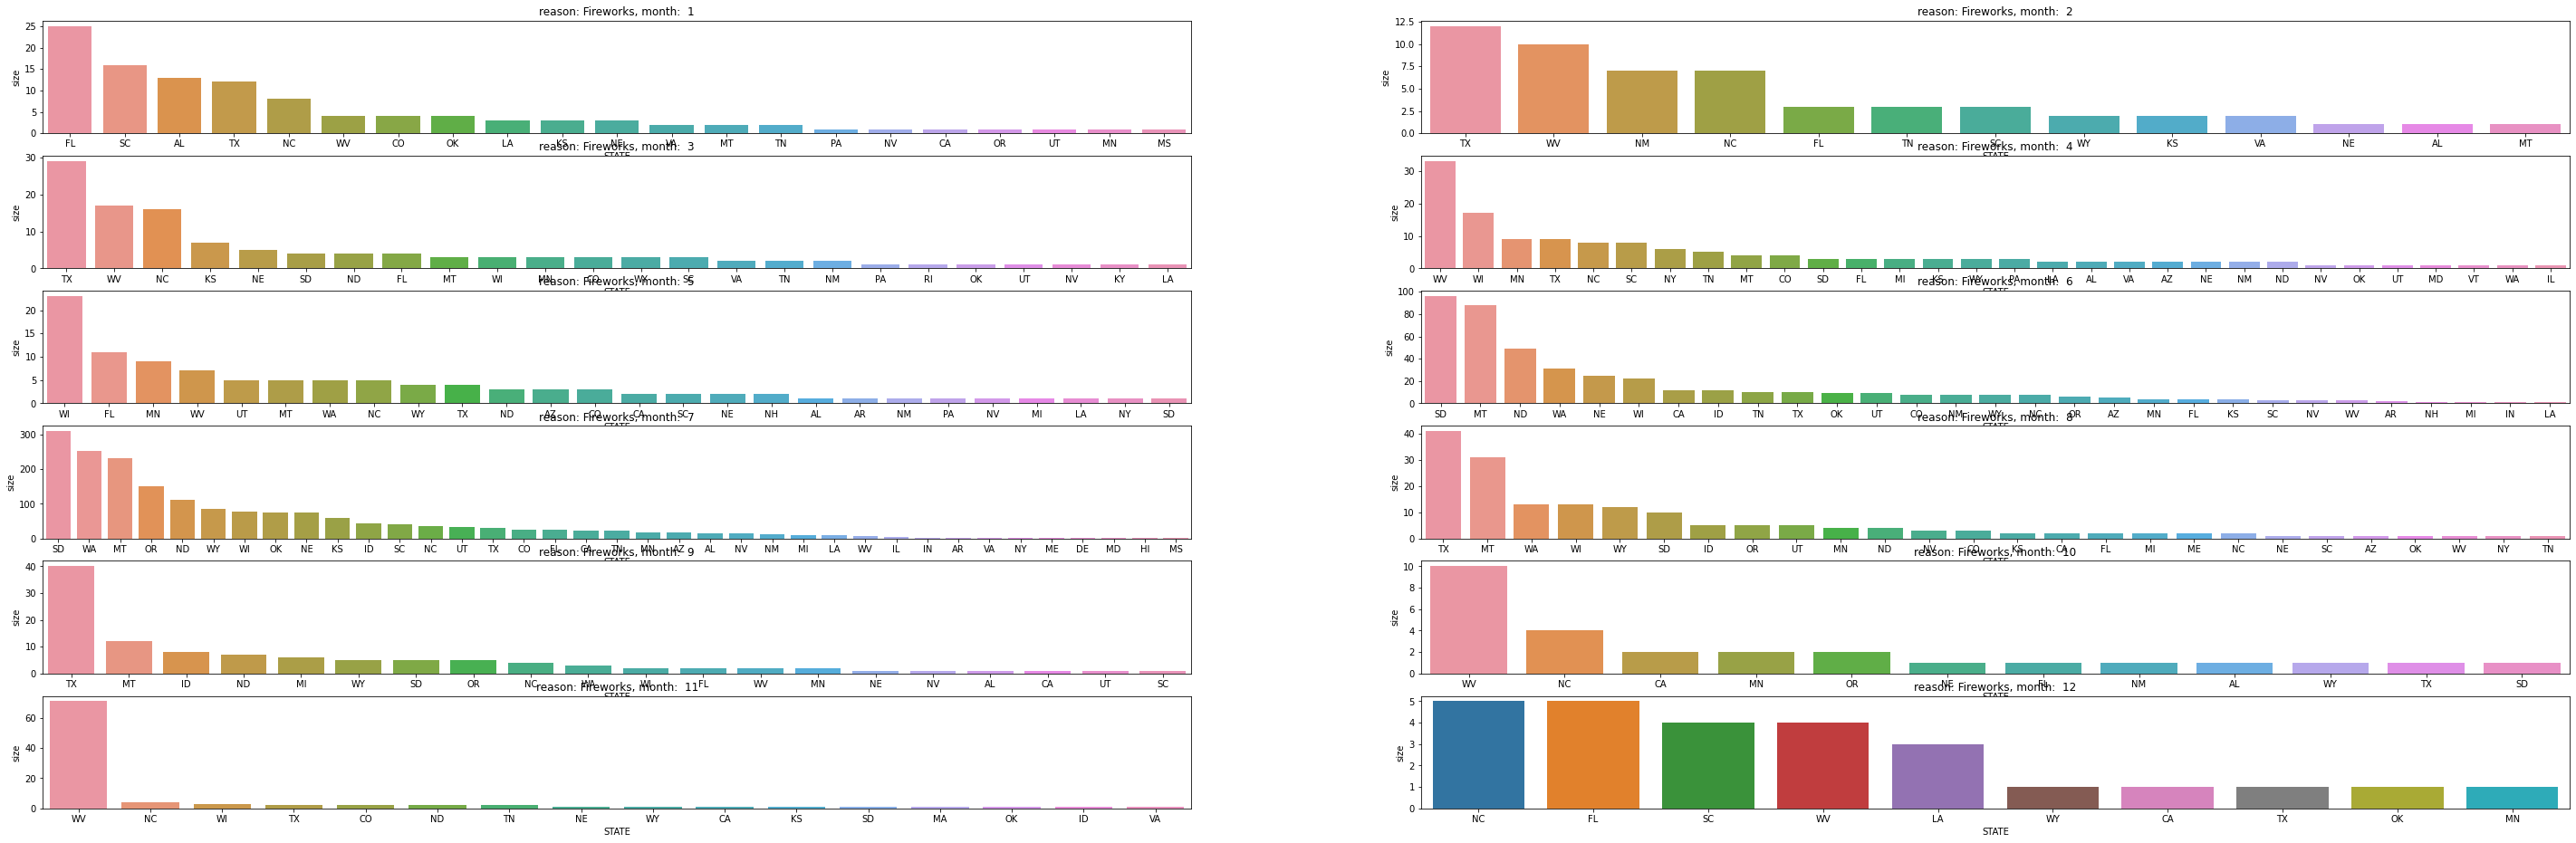

In [67]:
fig, axs = plt.subplots(6, 2, figsize=(50, 16))
for i in range(12):
  row = i // 2
  column = i % 2
  temp_df = df1[(df1["STAT_CAUSE_DESCR"] == "Fireworks") & (df1["month"] == i + 1)]
  axs[row][column].set_title(f"reason: Fireworks, month:  {i + 1}")
  sns.barplot(x="STATE", y="size", data=temp_df, ax=axs[row][column])
plt.show()